In [0]:
import os
import cv2

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd ..

/


In [0]:
cd content/drive/My Drive/PATH_TO_OUTPUT/vrd01

/content/drive/My Drive/PATH_TO_OUTPUT/vrd01


In [0]:
df=pd.read_csv('challenge-2018-train-vrd.csv')

In [0]:
df_train=df

In [0]:
images=df_train['ImageID'].values.tolist()

In [0]:
train_image = []

for i in images:
  img = cv2.imread("drive/My Drive/PATH_TO_OUTPUT/MELVIN2/"+i+".jpg")
  x1=int(img.shape[0]*(bb['XMin'][i]))
  x2=int(img.shape[0]*(bb['XMax'][i]))
  y1=int(img.shape[0]*(bb['YMin'][i]))
  y2=int(img.shape[0]*(bb['YMax'][i]))

  crop_img = img[y1:y2,x1:x2]
  crop_img = image.load_img(crop_img+'.jpg',target_size=(400,400,3))
  crop_img = image.img_to_array(crop_img)
  crop_img = crop_img/255
  train_image.append(crop_img)
X = np.array(train_image)

AttributeError: ignored

In [0]:
df_train.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [0]:
df1=df_train[['ImageID','LabelName1','LabelName2']]
df1.head()

,ImageID,LabelName1,LabelName2
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n
2,b54d41beabcfd900,/m/01mzpv,/m/083vt
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3


In [0]:
df2 = pd.concat([df1,pd.get_dummies(df1['LabelName2'])],axis=1)
# now drop the original 'country' column (you don't need it anymore)
df2.drop(['LabelName2'],axis=1, inplace=True)



```
# This is formatted as code
```



In [0]:
df2=df2[['ImageID','LabelName1','/m/02gy9n','/m/0dnr7','/m/05z87','/m/04lbp','/m/083vt']]

In [0]:
df2['None']=0

In [0]:
for index, row in df.iterrows():
  if df2["/m/02gy9n"][index]+df2['/m/0dnr7'][index]+df2['/m/05z87'][index]+df2['/m/04lbp'][index]+df2['/m/083vt'][index]==0:
    df2['None'][index]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df2.head(5)

,ImageID,LabelName1,/m/02gy9n,/m/0dnr7,/m/05z87,/m/04lbp,/m/083vt,None
0,fe58ec1b06db2bb7,/m/04bcr3,0,0,0,0,1,0
1,82d16a22f703df5c,/m/04dr76w,1,0,0,0,0,0
2,b54d41beabcfd900,/m/01mzpv,0,0,0,0,1,0
3,4b6a08cc110d7275,/m/01mzpv,0,0,0,0,0,1
4,0144cfbb726f4c72,/m/01mzpv,0,0,0,0,0,1


In [0]:
df.to_csv(r'content/drive/My Drive/PATH_TO_OUTPUT/df2.csv')

In [0]:
cd ..

/


In [0]:
X.shape

NameError: ignored

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [0]:
y = np.array(df2.drop(['ImageID','LabelName1'],axis=1))
y.shape

(194142, 5)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 64 samples, validate on 8 samples
Epoch 1/10
64/64 [==============================] - 8s 127ms/step - loss: 0.6918 - acc: 0.6531 - val_loss: 0.6431 - val_acc: 0.8000
Epoch 2/10
64/64 [==============================] - 1s 12ms/step - loss: 0.5838 - acc: 0.7281 - val_loss: 0.5154 - val_acc: 0.8000
Epoch 3/10
64/64 [==============================] - 1s 12ms/step - loss: 0.5377 - acc: 0.7406 - val_loss: 0.4598 - val_acc: 0.8000
Epoch 4/10
64/64 [==============================] - 1s 12ms/step - loss: 0.5351 - acc: 0.7688 - val_loss: 0.4557 - val_acc: 0.8000
Epoch 5/10
64/64 [==============================] - 1s 13ms/step - loss: 0.5163 - acc: 0.7688 - val_loss: 0.4476 - val_acc: 0.8000
Epoch 6/10
64/64 [==============================] - 1s 12ms/step - loss: 0.5167 - acc: 0.7781 - val_loss: 0.4376 - val_acc: 0.8000
Epoch 7/10
64/64 [==============================] - 1s 13ms/step - loss: 0.5209 - acc: 0.7594 - val_loss: 0.4352 - val_acc: 0.8000
Epoch 8/10
64/64 [=====================

In [0]:
cd content/drive/My Drive/PATH_TO_OUTPUT/MELVIN

/content/drive/My Drive/PATH_TO_OUTPUT/MELVIN


In [0]:
img = image.load_img('0a4f39ffd059e1a2.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [0]:
classes = np.array(df2.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
proba

array([[0.14653268, 0.15097013, 0.35855538, 0.38355398, 0.23789787]],
      dtype=float32)

/m/04lbp (0.14)


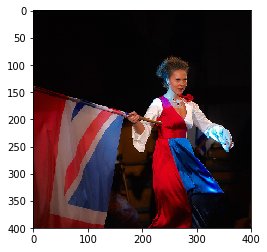

In [0]:
top = np.argsort(proba[0])
for i in range(1):
    print("{}".format(classes[top[i]])+" ({:.2})".format(proba[0][top[i]]))
plt.imshow(img)